# Importar librerias

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
import multiprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from datetime import datetime as dt
import sys
import os
main_dir = os.path.abspath('..')
export_path = os.path.join(main_dir,'00_Utilities')
# adding Folder_2 to the system path
sys.path.insert(0, export_path)
from dirFunc import *

import warnings
warnings.filterwarnings('ignore')


Bad key text.latex.preview in file c:\Users\giaan\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\Users\giaan\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\Users\giaan\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

# Importar datos

In [2]:
ruta_origen = 'Datos'

# De SAP
df = pd.read_csv(ruta_origen + '\\datosPreprocesados.csv')
df.drop(columns=['genEstado','genTipoReparacion','genModelo'],inplace=True)

In [3]:
df6

,genTipoComp,genHh,genNVueltas,genDuracion,genDemora,repNP,repNoKitCant,moVariacion,moDesarmeVariacion,moSalvatajeTrabajoReal,moSalvatajeCantPersonal,genPromExp,genPondNivel,repYCostos,moYCostos,ttaYCostos,genYCostos
0,MO,11537.0,3,513.0,-4.0,748.0,2443.0,0.106629,-0.075239,44.5,7.0,2107.295455,3.295455,353396.34,44808.31,165.93,409120.58
1,MO,25167.0,0,484.0,0.0,664.0,1583.0,0.118208,-0.259574,33.0,4.0,2020.321429,2.964286,253138.82,32281.09,1364.02,299914.32
2,MO,12295.0,2,535.0,0.0,1157.0,6846.0,0.217008,-0.251932,0.0,0.0,2699.710526,3.368421,412310.59,66509.03,2093.40,511163.02
3,MO,4364.0,2,390.0,0.0,624.0,1412.0,0.227270,0.000000,0.0,0.0,2602.324324,3.162162,189422.26,32109.42,1198.09,237829.77
4,MO,0.0,0,460.0,0.0,807.0,2113.0,0.207955,-0.191781,38.5,3.0,2798.500000,3.300000,248316.76,29690.69,1416.82,290786.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,MA,14547.0,4,12.0,0.0,25.0,21.0,0.064000,-0.036145,13.0,3.0,1880.750000,2.625000,76560.07,5858.98,0.00,82419.05
991,MA,21256.0,2,12.0,0.0,35.0,24.0,0.074403,0.000000,11.5,2.0,2802.166667,3.333333,64758.38,5722.27,0.00,70609.53
992,MF,23099.0,3,14.0,0.0,17.0,18.0,0.991479,1.857143,16.0,1.0,3577.300000,2.800000,82203.88,7792.44,0.00,97211.58
993,CO,15000.0,4,0.0,-5.0,35.0,32.0,0.092466,-0.134021,6.0,1.0,0.000000,3.400000,34945.55,5702.74,0.00,41028.49


# Utilidades

In [4]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

## Data Functions

In [5]:
# Variables Personalizadas
duracion_ix, MO_DyE_ix, MO_Reparar_ix, MO_End_ix = 15, 9, 10, 11
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        pass
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        moPondDuracion = X[:, duracion_ix] / (X[:, MO_DyE_ix] + X[:, MO_Reparar_ix] + X[:, MO_End_ix])
        return self # np.c_[X, moPondDuracion]

In [6]:
def divisionEstratificada(df,colEstratificada,componente):
    if componente:
        filterDf = df[df[colEstratificada] == componente]
        train_set, test_set = train_test_split(filterDf, test_size=0.2,random_state=42)
        return train_set, test_set

    else:
        split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
        for train_index, test_index in split.split(df, df[colEstratificada]):
            strat_train_set = df.loc[train_index]
            strat_test_set = df.loc[test_index]
        return (strat_train_set, strat_test_set)

In [7]:
def filterColumnsName(col,string, start, opposite=False):
    # Return a datatype called index from pandas
    filter = col.str.startswith(string) if start else col.str.endswith(string)

    return col[~filter] if opposite else col[filter]


In [8]:
def filterColumn(dataTrain,tipo): # tipo puede ser ['gen','mo','rep']
    col = dataTrain.columns
    varPredictivas = filterColumnsName(col,'YCostos',start=False)
    label = filterColumnsName(varPredictivas,tipo,start=True)
    varExplicativas = filterColumnsName(col,'YCostos',start=False,opposite=True)
    if tipo == 'mo':
        varExplicativas = filterColumnsName(varExplicativas,'rep',start=True,opposite=True)
    elif tipo == 'rep':
        varExplicativas = filterColumnsName(varExplicativas,'mo',start=True,opposite=True)
    dfX = dataTrain.copy()[varExplicativas.tolist()]
    dfY = dataTrain.copy()[label.tolist()]
    return dfX, dfY

In [9]:
def variableType(df,catCol, filtro='gen'):
    vCat = [catCol] if filtro =='gen' else []
    # vCat = list(set(catCol) - set(colRemove))
    vNum = df.drop(columns=catCol).columns.tolist()
    return vCat, vNum

## Model Functions

In [10]:
from sklearn.impute import SimpleImputer
def modelPipeline(df,vNum):
    # Normalizar y añadir variables numericas
    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        # ('std_scaler', StandardScaler()),
        ])
    full_pipeline = ColumnTransformer([
    ("num", num_pipeline, vNum),])
    df_prepared = full_pipeline.fit_transform(df) 
    return df_prepared, full_pipeline
    # Variables categoricas y numericas
    # if vCat:
    #     full_pipeline = ColumnTransformer([
    #     ("num", num_pipeline, vNum),
    #     ("cat", OneHotEncoder(), vCat),])
    #     df_prepared = full_pipeline.fit_transform(df) 
    #     return df_prepared, full_pipeline
    # else:
    #     full_pipeline = ColumnTransformer([
    #     ("num", num_pipeline, vNum),])
    #     df_prepared = full_pipeline.fit_transform(df) 
    #     return df_prepared, full_pipeline

In [11]:
def gridSearchModel(df_prepared, df_labels, model,nEstimator,maxFeatures,maxSamples,maxLeafNodes):
    param_grid = [{'n_estimators': nEstimator, 
                    'max_features': maxFeatures,
                    'max_samples': maxSamples,
                    'max_depth':[5],
                    'max_leaf_nodes': maxLeafNodes,
                    'min_samples_leaf':[5]}]

    grid_search = GridSearchCV(model, param_grid, cv=10,scoring='neg_mean_squared_error',
    return_train_score=True)
    grid_search.fit(df_prepared, df_labels)
    return grid_search

In [12]:
def rmseR2Calculator(modelo, x_test,y_test):
    final_predictions = modelo.predict(x_test)
    final_mse = mean_squared_error(y_test, final_predictions)
    final_rmse = np.sqrt(final_mse)

    r2 = r2_score(
        y_true  = y_test,
        y_pred  = final_predictions
       )
    final_mae = mean_absolute_error(y_true=y_test,y_pred=final_predictions)
    return final_rmse, final_mae, r2

## Funciones de graficos

In [13]:
def getMainFeatures(modelo,vNum,componente):
    feature_importances = modelo.best_estimator_.feature_importances_
    # if componente:
    #     attributes = vNum
    # else:
    # if vCat:
    #     cat_encoder = pipeline.named_transformers_["cat"]
    #     cat_one_hot_attribs = list(np.concatenate(cat_encoder.categories_,axis=0))
    #     attributes = vNum + cat_one_hot_attribs 
    # else:
    attributes = vNum
    features = sorted(zip(feature_importances, attributes), reverse=True)
    return features

In [14]:
def plotFeatures(features,limit,filtroVar,componente):
  # plt.clf()
  plt.close()
  plt.clf()
  importance = []
  colNames = []

  for i in range(len(features)):
    importance.append(features[i][0])
    colNames.append(features[i][1])
  tipoVar = ['Repuestos' if i.startswith('rep') else 
            'Mano de Obra' if i.startswith('mo') else 
            'Generales' for i in colNames]
  df = pd.DataFrame({'Nombre de Columna': colNames,'Importancia': importance,'Clasificación': tipoVar})
  # f, ax = plt.subplots()
  ax = sns.barplot(data=df[:limit],x='Nombre de Columna', y='Importancia',
                  hue='Clasificación',dodge=False, palette=sns.color_palette("deep"))
  ax.set_xticklabels(colNames[:limit], rotation = 90)
  if componente:
        name = f'{filtroVar}{componente}RForest'
  else:
        name = f'{filtroVar}RForest'
  # plt.tight_layout()
  # plt.figure(figsize=(9, 11))
  ax.figure.savefig(f'img/barplots/{name}.png',bbox_inches='tight')

In [15]:
def treePlot(model, attributes,filtroVar,componente):
    plt.close()
    plt.clf()
    fig = plt.figure(figsize=(55, 10))
    plot_tree(model.best_estimator_.estimators_[1],feature_names = attributes,
            class_names= 'CostoTotal',filled = True,impurity = False,
            fontsize = 12,precision = 2,max_depth=4)
    if componente:
        name = f'{filtroVar}{componente}RForest'
    else:
        name = f'{filtroVar}RForest'
    plt.tight_layout()
    # fig = plt.figure(figsize=(9, 11))
    fig.savefig(f'img/trees/{name}.png',bbox_inches='tight')

# Modelo

In [16]:
def exeModelo(df,filtro,modelo,compCol,nEstimator,maxFeatures,maxSamples,maxLeafNodes,componente=None):
    # Dividir Data de entrenamiento y testeo
    dataTrain, dataTest = divisionEstratificada(df,compCol,componente)
    dataTrain.drop(columns=[compCol],inplace=True)
    dataTest.drop(columns=[compCol],inplace=True)

    # Separar Variables explicativas y predictivas
    dfX,dfY = filterColumn(dataTrain,filtro)

    dfX_test,dfY_test = filterColumn(dataTest,filtro)

    # Variables Categoricas VS Numericas
    # vCat,vNum = variableType(dfX,compCol,filtro)
    vNum = dfX.columns.tolist()

    df_prepared, full_pipeline = modelPipeline(dfX,vNum)
    df_prepared_test = full_pipeline.transform(dfX_test)

    gridModel = gridSearchModel(df_prepared,dfY,modelo,nEstimator,maxFeatures,maxSamples,maxLeafNodes)
    
    features = getMainFeatures(gridModel,vNum,componente)

    plotFeatures(features,10,filtro,componente)

    treePlot(gridModel, vNum,filtro,componente)
    rmse,mae,r2 = rmseR2Calculator(gridModel,df_prepared_test,dfY_test)    
    return features, rmse,mae,r2,gridModel.best_params_, len(dataTrain)

In [17]:
lst = []
# Establecer las posibles opciones del modelo
tipoComponente = [None,'CO','DI','MA','MF','MO','TR']
nombreComponente = ['Todos','Convertidor','Diferencial','Maza','Mando Final','Motor','Transmisor']
configVar = ['gen','mo','rep'] # 
nombreConfig = ['Completo','Mano de Obra','Repuestos'] # 

In [18]:
filterDict = {}
# newMaxFeatures = [5,8,11,14]
# ['maxLeafNodes'] = [5,10]
# ['maxSamples'] = [0.20,0.5]
# newEstimators = [25,28,31]
filterDict[('Completo','Todos')] = {
    'dropCol':['genDemora'],
    # 'maxFeatures':[5],
    # 'maxLeafNodes':[15],
    # 'maxSamples':[0.4],
    # 'estimators':[13],  
    } # Error: 26759.79355118913 Listo
filterDict[('Completo','Convertidor')] = {
    # 'dropCol':['moDesarmeVariacion','moSalvatajeTrabajoReal','moSalvatajeCantPersonal','genNVueltas','genDemora','genDuracion','moArmadoVariacion'],
    # 'maxFeatures':[6],
    # 'maxLeafNodes':[7],
    # 'maxSamples':[0.44],
    # 'estimators':[30],    
    } # Error: 5406.1345535778955 listo
filterDict[('Completo','Diferencial')] = {
    # 'dropCol':['moSalvatajeCantPersonal','moDesarmeCantPersonal','moPondNivel','moArmadoCantPersonal','moDesarmeVariacion','moSalvatajeTrabajoReal'],
    # 'maxFeatures':[8,9,10],
    # 'maxLeafNodes':[12,13,14],  
    # 'maxSamples':[0.53,0.54,0.55],
    # 'estimators':[30,31,32],  
    } # Error: 7067.682046593414 Listo
filterDict[('Completo','Maza')] = {
    # 'dropCol':['moSalvatajeCantPersonal','moDesarmeCantPersonal','genNVueltas','genDemora','repNoKitNPNuevo','moArmadoCantPersonal','moDesarmeTrabajoReal'],
    # 'maxFeatures':[9,10],
    # 'maxLeafNodes':[9,10,11],  
    # 'maxSamples':[0.45,0.46,0.47],
    # 'estimators':[21,22,23],  
    } # Error: 21857.070409374544 Listo
filterDict[('Completo','Mando Final')] = {
    # 'dropCol':['genDemora','moDesarmeVariacion','moSalvatajeCantPersonal','genNVueltas','moArmadoCantPersonal','moArmadoCantPersonal','repNoKitNP','moArmadoVariacion','moDesarmeCantPersonal'],
    # 'maxFeatures':[3,4,5],
    # 'maxLeafNodes':[5,6,7],  
    # 'maxSamples':[0.45,0.46,0.47],
    # 'estimators':[33,34,35],  
    } # Error: 38196.81968793573 Listo
filterDict[('Completo','Motor')] = {
    # 'dropCol':['genNVueltas','moArmadoVariacion','moSalvatajeCantPersonal','genDemora','genDuracion','moArmadoCantPersonal','moDesarmeVariacion','repKitNP','moDesarmeCantPersonal','moSalvatajeTrabajoReal'],
    # 'maxFeatures':[4,5],
    # 'maxLeafNodes':[11,12,13], 
    # 'maxSamples':[0.47,0.48,0.49],
    # 'estimators':[39,40,41],  
    } # Error: 35730.50842497335 
filterDict[('Completo','Transmisor')] = {
    # 'dropCol':['moSalvatajeTrabajoReal','genDemora','genNVueltas','moSalvatajeCantPersonal','moDesarmeCantPersonal','moDesarmeVariacion','moArmadoCantPersonal','moPondNivel','moArmadoVariacion'],
    # 'maxFeatures':[4,5,6],
    # 'maxLeafNodes':[9,10,11], 
    # 'maxSamples':[0.44,0.45,0.46],
    # 'estimators':[26,27,28],   
    } # Error: 15606.506858155002 Listo

Completo Todos
Completo Convertidor
Completo Diferencial
Completo Maza
Completo Mando Final
Completo Motor
Completo Transmisor
Mano de Obra Todos
Mano de Obra Convertidor
Mano de Obra Diferencial
Mano de Obra Maza
Mano de Obra Mando Final
Mano de Obra Motor
Mano de Obra Transmisor
Repuestos Todos
Repuestos Convertidor
Repuestos Diferencial
Repuestos Maza
Repuestos Mando Final
Repuestos Motor
Repuestos Transmisor


<Figure size 640x480 with 0 Axes>

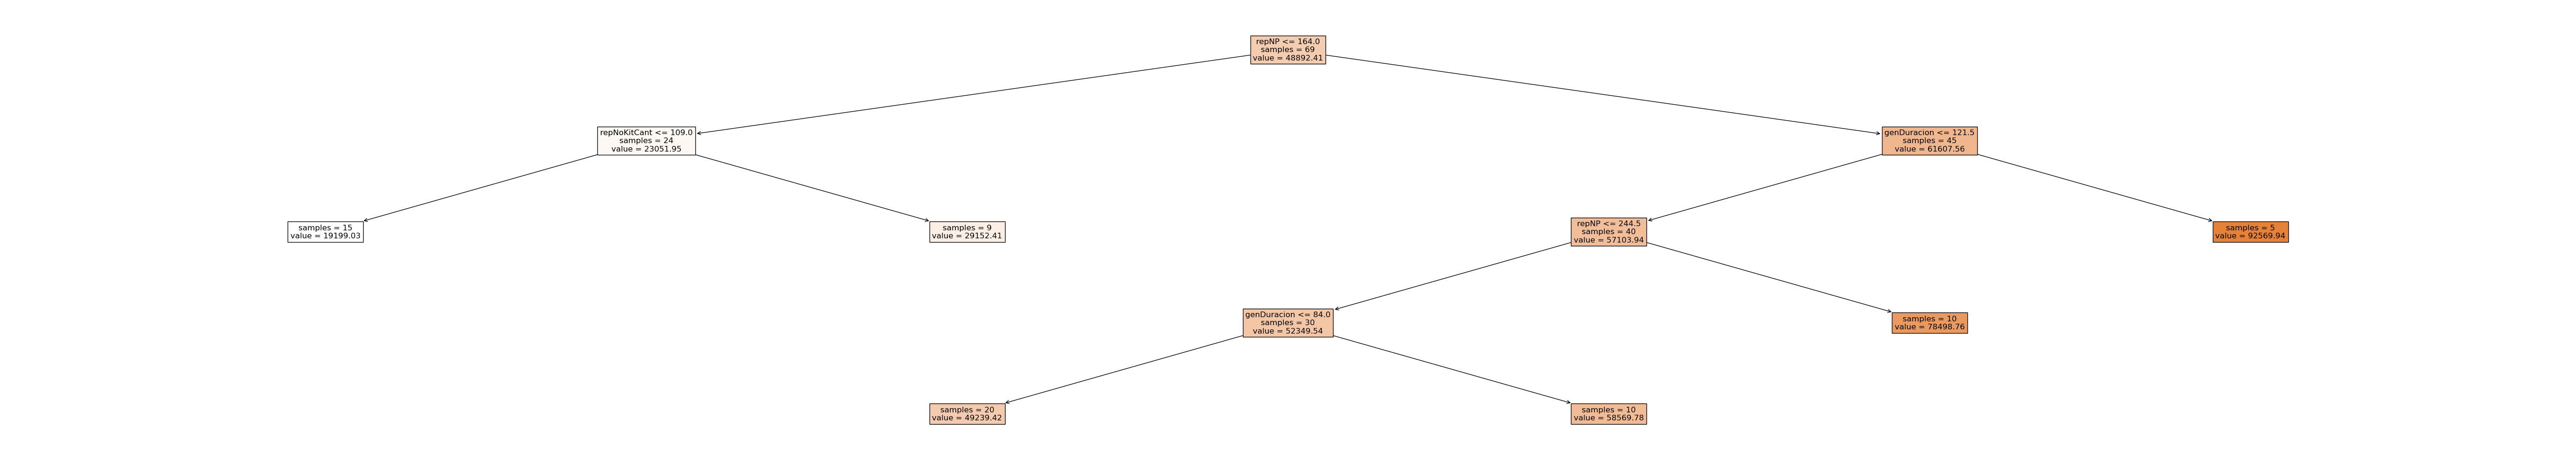

In [19]:
for nConf, conf in zip(nombreConfig,configVar):
    for nComp, componente in zip(nombreComponente,tipoComponente):
        print(nConf,nComp)
        # Try filtering Columns
        dfModel = df.copy()
        newEstimators = [20,25,30,35,40]
        newMaxFeatures = [2,3,4,5,6,7,8,9,10]
        newMaxSamples = [0.3,0.35,0.4,0.45,0.5,0.6,0.7,0.8]
        newMaxLeafNodes = [5,6,7,8,9,10,11,13]
        # try:
        #     dropCol = filterDict[(nConf,nComp)]['dropCol']
        #     dfModel = df.copy().drop(columns=dropCol)
        # except:
        #     dfModel = df.copy()
        
        # # Try modify gridsearch
        # try:
        #     newEstimators = filterDict[(nConf,nComp)]['estimators']
        #     newMaxFeatures = filterDict[(nConf,nComp)]['maxFeatures']
        # except:
        #     # Default
        #     newEstimators = [15,20,25,30,35]
        #     newMaxFeatures = [2,3,4,5,6,7,8]
        # try: 
        #     newMaxSamples = filterDict[(nConf,nComp)]['maxSamples']
        # except:
        #     newMaxSamples = [0.3,0.35,0.4,0.45,0.5]
        # try: 
        #     newMaxLeafNodes = filterDict[(nConf,nComp)]['maxLeafNodes']
        # except:
        #     newMaxLeafNodes = [5,7,9,11,13]
        # Execute Modelo
        start = dt.now()
        features, rmse,mae, r2, bestParams, totalDatos = exeModelo(dfModel,conf,RandomForestRegressor(),'genTipoComp',newEstimators,newMaxFeatures,newMaxSamples,newMaxLeafNodes,componente)
        running_mins =round((dt.now() - start).seconds/60,2)
        # Documenta Resultados
        # Total de Variables
        totalVar = len(features)

        # Mejores y peores variables
        topVar = '\n'.join([f"{i+1}. {el}: {round(imp,3)}" for i,(imp,el) in enumerate(features[:5])]).strip()
        allVar = '\n'.join([f"{i+1}. {el}: {round(imp,3)}" for i,(imp,el) in enumerate(features)]).strip()

        # Parametros usados
        params = "\n".join("{}:\t{}".format(k, v) for k, v in bestParams.items())

        lst.append(['Random Forest', nConf, nComp,totalVar,topVar,allVar,totalDatos,rmse,mae,r2,params,running_mins])

# Crea el data frame de resultados
cols = ['Modelo', 'Conjunto de Variables', 'Componente','Total de Variables','Variables Significativas','Todas las Variables','Datos de Entrenamiento', 'RMSE','MAE','R2','Mejores Parametros','Tiempo de Ejecución']

results = pd.DataFrame(lst, columns=cols)

In [20]:
for comp in nombreComponente:
    focusVar = results[results.Componente==comp]
    print(comp + '\n')
    print('Parametros Usados')
    print(focusVar['Mejores Parametros'].values[0])
    print('')
    print(f'Total Variables: {focusVar["Total de Variables"].values[0]}')
    print('')
    print(f'Datos: {focusVar["Datos de Entrenamiento"].values[0]}')
    print('')
    print(f'Error: {focusVar["RMSE"].values[0]}')
    print('')

Todos

Parametros Usados
max_depth:	5
max_features:	10
max_leaf_nodes:	13
max_samples:	0.5
min_samples_leaf:	5
n_estimators:	30

Total Variables: 12

Datos: 796

Error: 33390.29312783461

Convertidor

Parametros Usados
max_depth:	5
max_features:	9
max_leaf_nodes:	13
max_samples:	0.7
min_samples_leaf:	5
n_estimators:	25

Total Variables: 12

Datos: 93

Error: 10733.52219600717

Diferencial

Parametros Usados
max_depth:	5
max_features:	10
max_leaf_nodes:	10
max_samples:	0.8
min_samples_leaf:	5
n_estimators:	20

Total Variables: 12

Datos: 128

Error: 6978.993538503534

Maza

Parametros Usados
max_depth:	5
max_features:	4
max_leaf_nodes:	13
max_samples:	0.45
min_samples_leaf:	5
n_estimators:	20

Total Variables: 12

Datos: 198

Error: 22363.882479796284

Mando Final

Parametros Usados
max_depth:	5
max_features:	9
max_leaf_nodes:	13
max_samples:	0.7
min_samples_leaf:	5
n_estimators:	20

Total Variables: 12

Datos: 162

Error: 40915.15247653948

Motor

Parametros Usados
max_depth:	5
max_fea

In [21]:
len(df[df.genTipoComp=='MF'])

203

# Exportar Datos

In [22]:
ruta_destino = '05_Resultados'

# De SAP
exportar_csv(results,ruta_destino,'resultados')
exportar_excel(results,ruta_destino,'resultados')